In [2]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [4]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("farzadnekouei/pothole-image-segmentation-dataset")

print(".", path)

c:\Users\ed\Documents\maestria\jupyter\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


. C:\Users\ed\.cache\kagglehub\datasets\farzadnekouei\pothole-image-segmentation-dataset\versions\2


In [6]:
# Mount Google Drive
#from google.colab import drive

#drive.mount('/content/drive', force_remount=True)

# Paths
dataDir = "./Pothole_Segmentation_YOLOv8/"  # Folder containing images


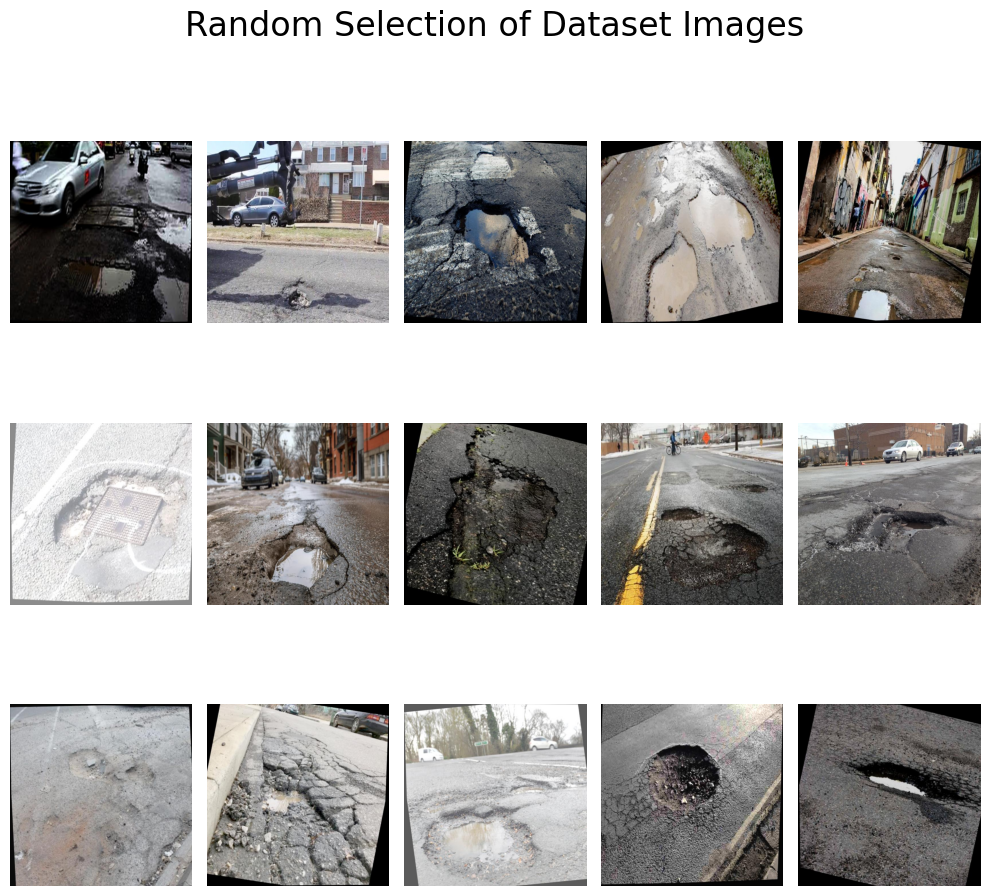

In [7]:
trainImagePath = os.path.join(dataDir, 'train/','images/')

#list of the images
imageFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.jpg')]

randomImages = random.sample(imageFiles, 15)

plt.figure(figsize=(10, 10))

for i, image_file in enumerate(randomImages):

    image_path = os.path.join(trainImagePath, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

  # Add a suptitle
plt.suptitle('Random Selection of Dataset Images', fontsize=24)

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
model = YOLO('yolov8n.pt') # for segmentation use 'yolov8n-seg.pt, change the model as you like !

In [9]:
yamlFilePath = os.path.join(dataDir,'data.yaml' )

In [10]:
results = model.train(
    data= yamlFilePath,
    epochs=5,
    imgsz=640,
    batch=32,
    optimizer='auto',
    lr0=0.0001,              # Initial learning rate
    lrf=0.01,                # Final learning rate (lr0 * lrf)
    dropout=0.25,            # Use dropout regularization
    device='cpu',                # Device to run on, i.e. cuda device=0
    seed=42
)

Ultralytics 8.3.201  Python-3.13.5 torch-2.8.0+cpu CPU (AMD Ryzen 5 3400G with Radeon Vega Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./Pothole_Segmentation_YOLOv8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.25, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pers


image 1/1 c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\Pothole_Segmentation_YOLOv8\valid\images\pic-114-_jpg.rf.a0f30e06b3b96d7879d5f55a7012433c.jpg: 640x640 1 Pothole, 140.8ms
Speed: 3.6ms preprocess, 140.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\Pothole_Segmentation_YOLOv8\valid\images\pic-144-_jpg.rf.61a3b886f058ed3a4788426cfa7c4988.jpg: 640x640 1 Pothole, 120.2ms
Speed: 4.2ms preprocess, 120.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\Pothole_Segmentation_YOLOv8\valid\images\pic-165-_jpg.rf.82b3db37518b15aa73be6e4093deaf46.jpg: 640x640 4 Potholes, 114.1ms
Speed: 4.2ms preprocess, 114.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\Pothole_Segmentatio

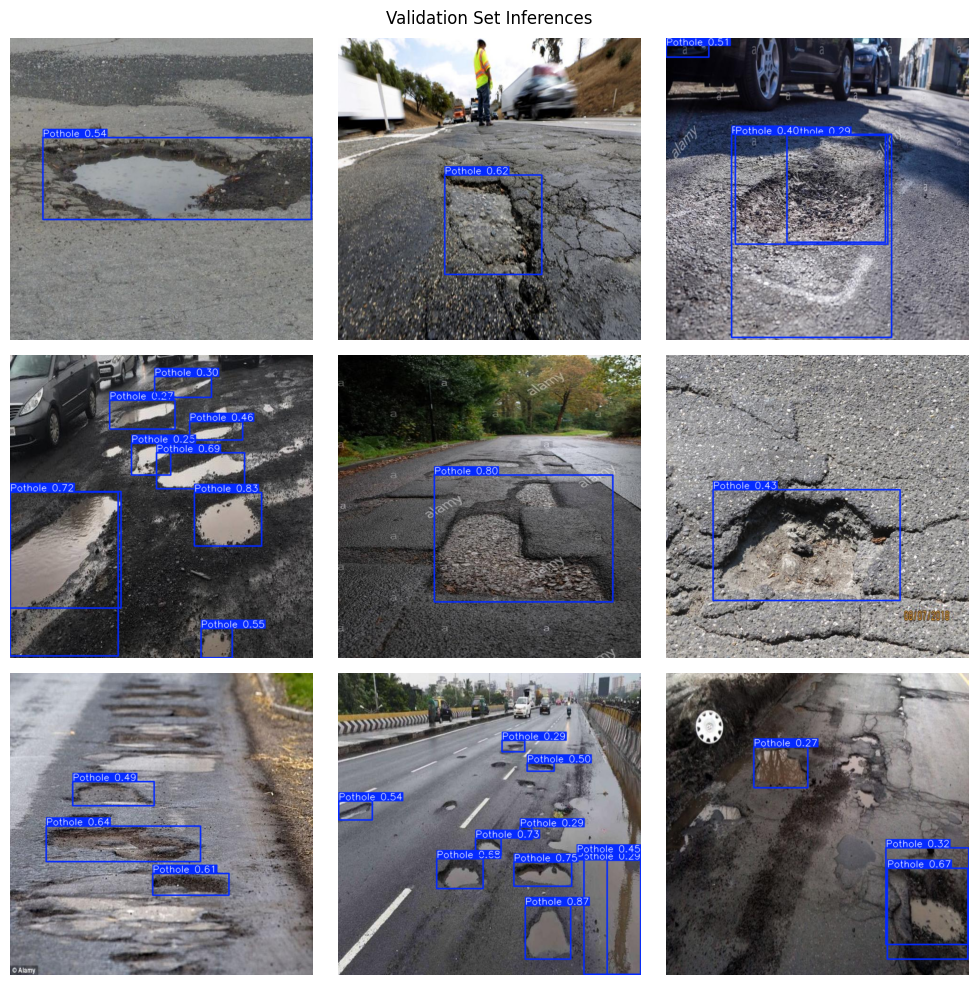

In [ ]:
validImagePath = os.path.join(dataDir, 'valid', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

#select Random images
numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set Inferences')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = model.predict(source= imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()

Make the Inference video

In [ ]:
# Change the model for the best model and do everything again and compare

bestModelpath = './runs/detect/train/weights/best.pt'
bestModel = YOLO(bestModelpath)

In [13]:
import shutil
videoPath = './sample_video.mp4'

model.predict(source=videoPath, save=True)


WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 93.2ms
video 1/1 (frame 2/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 75.8ms
video 1/1 (frame 3/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 79.6ms
video 1/1 (frame 4/692) c:\Users\ed\Documents\ma

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Pothole'}
 obb: None
 orig_img: array([[[139, 130, 122],
         [163, 154, 146],
         [164, 155, 147],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        [[197, 188, 180],
         [203, 194, 186],
         [169, 160, 152],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        [[152, 143, 135],
         [177, 168, 160],
         [181, 172, 164],
         ...,
         [246, 243, 244],
         [246, 243, 244],
         [246, 243, 244]],
 
        ...,
 
        [[ 81,  93, 103],
         [ 75,  87,  97],
         [ 65,  77,  87],
         ...,
         [ 58,  78,  98],
         [ 60,  80, 100],
         [ 63,  83, 103]],
 
        [[ 65,  77,  87],
         [ 63,  75,  85],
         [ 58,  70,  80],
         ...,
         [ 64,  7

In [15]:
import subprocess

# Convert AVI to MP4 using FFmpeg
subprocess.call(['ffmpeg', '-y', '-loglevel', 'panic', '-i', './Pothole_Segmentation_YOLOv8/output_video.mp4'])

from IPython.display import Video

# Display the converted MP4 video
Video("./Pothole_Segmentation_YOLOv8/output_video.mp4", embed=True, width=960)

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [22]:
import shutil
import subprocess
from IPython.display import Video


# Path to the input video
video_path = './sample_video.mp4'

# Run the YOLO model on the video and save the output
results = model.predict(source=video_path, save=True, save_txt=False, save_conf=False)

# The default output is saved in the 'runs/detect' folder in a subfolder named after the model
output_dir = './Pothole_Segmentation_YOLOv8'
output_video_path = f'{output_dir}/output_video.mp4'  # Make sure this is the correct saved output path

# Convert the output video to MP4 using FFmpeg (if necessary)
# This step is often unnecessary since YOLO typically saves output as MP4 by default, but if needed, run FFmpeg:
#subprocess.call(['ffmpeg', '-y', '-loglevel', 'panic', '-i', output_video_path, output_video_path])

# Display the converted MP4 video
Video(output_video_path, embed=True, width=960)



WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 120.4ms
video 1/1 (frame 2/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 96.7ms
video 1/1 (frame 3/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 93.4ms
video 1/1 (frame 4/692) c:\Users\ed\Documents\m

In [ ]:
import shutil
from ultralytics import YOLO
from IPython.display import Video
import os

# Path to the input video
video_path = './sample_video.mp4'

# Run the YOLO model on the video and specify the save directory in Google Drive
results = model.predict(source=video_path, save=True, save_txt=False, save_conf=False, save_dir='./')

# Output will now be saved directly in your Google Drive folder
print(f"Results saved directly to Google Drive.")


# YOLO typically saves the output in 'runs/detect'
output_video_path = os.path.join('./Pothole_Segmentation_YOLOv8/', 'output_video.mp4')  # Check if the video is saved here


# Display the output video using IPython
Video(output_video_path, embed=True, width=960)



WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 204.9ms
video 1/1 (frame 2/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 85.1ms
video 1/1 (frame 3/692) c:\Users\ed\Documents\maestria\deep_learning_2025-2\week3\Exercise_2\sample_video.mp4: 384x640 1 Pothole, 98.6ms
video 1/1 (frame 4/692) c:\Users\ed\Documents\m

In [ ]:
!ls ./runs/detect/

train
train2
train3
train4
train5
train6
train7
train8
train810
train811
train812
train82
train83
train84
train85
train86
train87
train88
train89


: 